In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Yeni Bölüm

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/cs412-fall2020/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/cs412-fall2020/test.csv')

In [ ]:
# Print shape
print("Data dimensionality: ", train_df.shape)

# Print random 5 rows
print("Examples from data: ", train_df.head())

print("Information about train data ", train_df.info())

test_ID = test_df['ID']

Data dimensionality:  (5529, 54)
Examples from data:     ID GenderSelect  ... RemoteWork  JobSatisfaction
0   1         Male  ...        NaN               10
1   2         Male  ...        NaN               10
2   3       Female  ...     Rarely               10
3   4       Female  ...     Rarely               10
4   5       Female  ...     Rarely               10

[5 rows x 54 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      5529 non-null   int64  
 1   GenderSelect                            5519 non-null   object 
 2   Country                                 5513 non-null   object 
 3   Age                                     5461 non-null   float64
 4   EmploymentStatus                        5529 non-null   object 
 5   CodeWriter      

In [ ]:
train_label = train_df.pop('JobSatisfaction')

In [ ]:
for col in train_df:
  print("NaN value percentage in: %", train_df[col].isnull().sum() / len(train_df) * 100)
  if (train_df[col].isnull().sum() / len(train_df) * 100) > 50 :
    train_df = train_df.drop(col, axis=1)
    test_df = test_df.drop(col, axis=1)
  else:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

train_df = train_df.drop(columns=['CodeWriter'])
test_df = test_df.drop(columns=['CodeWriter'])
train_df = train_df.drop(columns=['ID'])
test_df = test_df.drop(columns=['ID'])

for col in train_df:
  print("NaN value percentage in after: %", train_df[col].isnull().sum() / len(train_df) * 100)




NaN value percentage in: % 0.0
NaN value percentage in: % 0.18086453246518358
NaN value percentage in: % 0.2893832519442937
NaN value percentage in: % 1.2298788207632483
NaN value percentage in: % 0.0
NaN value percentage in: % 0.0
NaN value percentage in: % 0.03617290649303671
NaN value percentage in: % 1.8448182311448724
NaN value percentage in: % 1.2841381805028034
NaN value percentage in: % 4.177970699945741
NaN value percentage in: % 5.009947549285585
NaN value percentage in: % 3.5268583830710796
NaN value percentage in: % 54.22318683306203
NaN value percentage in: % 42.702116115029845
NaN value percentage in: % 46.80774100198951
NaN value percentage in: % 54.801953336950625
NaN value percentage in: % 45.812986073431
NaN value percentage in: % 60.173629951166575
NaN value percentage in: % 56.3573883161512
NaN value percentage in: % 27.943570265870864
NaN value percentage in: % 0.1266051727256285
NaN value percentage in: % 9.386869234943028
NaN value percentage in: % 0.253210345451

In [ ]:
train_df.head()

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessSO,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyLogisticRegression,WorkChallengeFrequencyDirtyData,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,Very useful,Very useful,Very useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,"10,000 or more employees",Always,Random Forests,Often,Most of the time,Often,Most of the time,Most of the time,Often,Often,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,Sometimes
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Very useful,Very useful,Very useful,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,Most of the time,Sometimes,Most of the time,Often,Most of the time,8.0,100% of projects,More internal than external,Business Department,Sometimes
2,Female,United States,34.0,Employed full-time,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,Somewhat useful,Very useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,Most of the time,Often,Often,Often,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,Very useful,Very useful,Somewhat useful,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,Most of the time,Most of the time,Most of the time,Often,Sometimes,Most of the time,2.0,76-99% of projects,Do not know,Other,Rarely
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,Fine,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,Very useful,Somewhat useful,Very useful,No,Doctoral degree,Mathematics or statistics,More than 10 years,"Researcher,Software Developer/Software Engineer",Computer Vision,"Bayesian Techniques,Evolutionary Approaches,Lo...",Internet-based,"10,000 or more employees",Sometimes,"Bayesian Techniques,CNNs,Regression/Logistic R...",Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Sometimes,Most of the time,8.0,100% of projects,Entirely internal,Other,Rarely


In [ ]:
for col in train_df.select_dtypes('object'):
  print(col, len(train_df[col].unique()))


GenderSelect_map = {'Male': 0, 'Female':1, 'A different identity':2, 'Non-binary, genderqueer, or gender non-conforming':3}
train_df['GenderSelect'] = train_df['GenderSelect'].replace(GenderSelect_map)
test_df['GenderSelect'] = test_df['GenderSelect'].replace(GenderSelect_map)

EmploymentStatus_map = {'Independent contractor, freelancer, or self-employed': 0, 'Employed full-time':1, 'Employed part-time':2}
train_df['EmploymentStatus'] = train_df['EmploymentStatus'].replace(EmploymentStatus_map)
test_df['EmploymentStatus'] = test_df['EmploymentStatus'].replace(EmploymentStatus_map)

TitleFit_map = {'Fine': 0, 'Poorly':1, 'Perfectly':2}
train_df['TitleFit'] = train_df['TitleFit'].replace(TitleFit_map)
test_df['TitleFit'] = test_df['TitleFit'].replace(TitleFit_map)

LearningPlatformUsefulnessKaggle_map = {'Very useful': 0, 'Somewhat useful':1, 'Not Useful':2}
train_df['LearningPlatformUsefulnessKaggle'] = train_df['LearningPlatformUsefulnessKaggle'].replace(LearningPlatformUsefulnessKaggle_map)
test_df['LearningPlatformUsefulnessKaggle'] = test_df['LearningPlatformUsefulnessKaggle'].replace(LearningPlatformUsefulnessKaggle_map)

LearningPlatformUsefulnessCourses_map = {'Very useful': 0, 'Somewhat useful':1, 'Not Useful':2}
train_df['LearningPlatformUsefulnessCourses'] = train_df['LearningPlatformUsefulnessCourses'].replace(LearningPlatformUsefulnessCourses_map)
test_df['LearningPlatformUsefulnessCourses'] = test_df['LearningPlatformUsefulnessCourses'].replace(LearningPlatformUsefulnessCourses_map)

LearningPlatformUsefulnessSO_map = {'Very useful': 0, 'Somewhat useful':1, 'Not Useful':2}
train_df['LearningPlatformUsefulnessSO'] = train_df['LearningPlatformUsefulnessSO'].replace(LearningPlatformUsefulnessSO_map)
test_df['LearningPlatformUsefulnessSO'] = test_df['LearningPlatformUsefulnessSO'].replace(LearningPlatformUsefulnessSO_map)

DataScienceIdentitySelect_map = {'Sort of (Explain more)': 0, 'No':1, 'Yes':2}
train_df['DataScienceIdentitySelect'] = train_df['DataScienceIdentitySelect'].replace(DataScienceIdentitySelect_map)
test_df['DataScienceIdentitySelect'] = test_df['DataScienceIdentitySelect'].replace(DataScienceIdentitySelect_map)

WorkToolsFrequencyPython_map = {'Often': 0, 'Sometimes':1, 'Most of the time':2, 'Rarely':3}
train_df['WorkToolsFrequencyPython'] = train_df['WorkToolsFrequencyPython'].replace(WorkToolsFrequencyPython_map)
test_df['WorkToolsFrequencyPython'] = test_df['WorkToolsFrequencyPython'].replace(WorkToolsFrequencyPython_map)

WorkToolsFrequencyR_map = {'Often': 0, 'Sometimes':1, 'Most of the time':2, 'Rarely':3}
train_df['WorkToolsFrequencyR'] = train_df['WorkToolsFrequencyR'].replace(WorkToolsFrequencyR_map)
test_df['WorkToolsFrequencyR'] = test_df['WorkToolsFrequencyR'].replace(WorkToolsFrequencyR_map)

WorkMethodsFrequencyDataVisualization_map = {'Often': 0, 'Sometimes':1, 'Most of the time':2, 'Rarely':3}
train_df['WorkMethodsFrequencyDataVisualization'] = train_df['WorkMethodsFrequencyDataVisualization'].replace(WorkMethodsFrequencyDataVisualization_map)
test_df['WorkMethodsFrequencyDataVisualization'] = test_df['WorkMethodsFrequencyDataVisualization'].replace(WorkMethodsFrequencyDataVisualization_map)

WorkMethodsFrequencyLogisticRegression_map = {'Often': 0, 'Sometimes':1, 'Most of the time':2, 'Rarely':3}
train_df['WorkMethodsFrequencyLogisticRegression'] = train_df['WorkMethodsFrequencyLogisticRegression'].replace(WorkMethodsFrequencyLogisticRegression_map)
test_df['WorkMethodsFrequencyLogisticRegression'] = test_df['WorkMethodsFrequencyLogisticRegression'].replace(WorkMethodsFrequencyLogisticRegression_map)

WorkChallengeFrequencyDirtyData_map = {'Often': 0, 'Sometimes':1, 'Most of the time':2, 'Rarely':3}
train_df['WorkChallengeFrequencyDirtyData'] = train_df['WorkChallengeFrequencyDirtyData'].replace(WorkChallengeFrequencyDirtyData_map)
test_df['WorkChallengeFrequencyDirtyData'] = test_df['WorkChallengeFrequencyDirtyData'].replace(WorkChallengeFrequencyDirtyData_map)

GenderSelect 4
Country 52
EmploymentStatus 3
CurrentJobTitleSelect 16
TitleFit 3
CurrentEmployerType 70
MLToolNextYearSelect 50
MLMethodNextYearSelect 25
LanguageRecommendationSelect 13
LearningPlatformUsefulnessKaggle 3
LearningPlatformUsefulnessCourses 3
LearningPlatformUsefulnessSO 3
DataScienceIdentitySelect 3
FormalEducation 7
MajorSelect 15
Tenure 6
PastJobTitlesSelect 1142
MLSkillsSelect 647
MLTechniquesSelect 1181
EmployerIndustry 16
EmployerSize 10
WorkProductionFrequency 6
WorkAlgorithmsSelect 1167
WorkToolsFrequencyPython 4
WorkToolsFrequencyR 4
WorkToolsFrequencySQL 4
WorkMethodsFrequencyCross-Validation 4
WorkMethodsFrequencyDataVisualization 4
WorkMethodsFrequencyLogisticRegression 4
WorkChallengeFrequencyDirtyData 4
WorkDataVisualizations 7
WorkInternalVsExternalTools 6
WorkMLTeamSeatSelect 5
RemoteWork 6


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
dummies = enc.fit_transform(train_df[['Country', 'CurrentJobTitleSelect', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'FormalEducation', 'MajorSelect',
                                      'Tenure', 'MLTechniquesSelect', 'WorkProductionFrequency', 'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation', 'WorkInternalVsExternalTools', 'WorkMLTeamSeatSelect', 'RemoteWork',
                                      'PastJobTitlesSelect', 'MLSkillsSelect', 'EmployerIndustry', 'EmployerSize', 'WorkAlgorithmsSelect', 'WorkDataVisualizations']]).toarray()
dummies = pd.DataFrame(dummies)
train_df = pd.merge(train_df, dummies, right_index=True, left_index=True)
train_df = train_df.drop(columns=['Country', 'CurrentJobTitleSelect', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'FormalEducation', 'MajorSelect',
                                      'Tenure', 'MLTechniquesSelect', 'WorkProductionFrequency', 'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation', 'WorkInternalVsExternalTools', 'WorkMLTeamSeatSelect', 'RemoteWork',
                                      'PastJobTitlesSelect', 'MLSkillsSelect', 'EmployerIndustry', 'EmployerSize', 'WorkAlgorithmsSelect', 'WorkDataVisualizations'])

dummies_test = enc.transform(test_df[['Country', 'CurrentJobTitleSelect', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'FormalEducation', 'MajorSelect',
                                      'Tenure', 'MLTechniquesSelect', 'WorkProductionFrequency', 'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation', 'WorkInternalVsExternalTools', 'WorkMLTeamSeatSelect', 'RemoteWork',
                                      'PastJobTitlesSelect', 'MLSkillsSelect', 'EmployerIndustry', 'EmployerSize', 'WorkAlgorithmsSelect', 'WorkDataVisualizations']]).toarray()
dummies_test = pd.DataFrame(dummies_test)
test_df = pd.merge(test_df, dummies_test, right_index=True, left_index=True)
test_df = test_df.drop(columns=['Country', 'CurrentJobTitleSelect', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'FormalEducation', 'MajorSelect',
                                      'Tenure', 'MLTechniquesSelect', 'WorkProductionFrequency', 'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation', 'WorkInternalVsExternalTools', 'WorkMLTeamSeatSelect', 'RemoteWork',
                                      'PastJobTitlesSelect', 'MLSkillsSelect', 'EmployerIndustry', 'EmployerSize', 'WorkAlgorithmsSelect', 'WorkDataVisualizations'])


In [ ]:
print("Information about train data ", train_df.info())
for col in train_df.select_dtypes('object'):
  print(col, len(train_df[col].unique()))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Columns: 4469 entries, GenderSelect to 4454
dtypes: float64(4457), int64(12)
memory usage: 188.5 MB
Information about train data  None


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(train_df, train_label, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4146, 4469)
Training Labels Shape: (4146,)
Testing Features Shape: (1383, 4469)
Testing Labels Shape: (1383,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
d= predictions - test_labels
mse_f = np.mean(d**2)
rmse_f = np.sqrt(mse_f)
print("RMSE:", rmse_f)

Mean Absolute Error: 1.7270000000000019
RMSE: 2.195580447912077


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 56.89 %.


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.04
Variable: CompensationScore    Importance: 0.02
Variable: TitleFit             Importance: 0.01
Variable: LearningPlatformUsefulnessKaggle Importance: 0.01
Variable: DataScienceIdentitySelect Importance: 0.01
Variable: WorkToolsFrequencyPython Importance: 0.01
Variable: WorkToolsFrequencyR  Importance: 0.01
Variable: WorkMethodsFrequencyDataVisualization Importance: 0.01
Variable: WorkMethodsFrequencyLogisticRegression Importance: 0.01
Variable: WorkChallengeFrequencyDirtyData Importance: 0.01
Variable:                  185 Importance: 0.01
Variable:                  193 Importance: 0.01
Variable:                  230 Importance: 0.01
Variable:                  237 Importance: 0.01
Variable:                  249 Importance: 0.01
Variable:                 1440 Importance: 0.01
Variable:                 1454 Importance: 0.01
Variable:                 1459 Importance: 0.01
Variable:                 1465 Importance: 0.01
Variable: GenderSelec

NameError: ignored

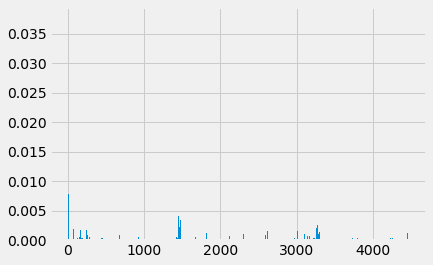

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [18]:
asd=rf.predict(test_df)
pd.DataFrame({'ID' : np.array(test_ID), 'Prediction' : asd }).to_csv('submission.csv', index=False)

from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>